In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

2023-05-26 20:23:47.249688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 20:23:47.642464: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 20:23:47.643732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 20:23:48.996131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(x_train)

len(y_train)

In [6]:
len(x_test)

10000

In [7]:
len(y_test)

10000

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
x_tr_f = x_train.reshape(len(x_train), 28*28)
x_tr_f.shape

(60000, 784)

In [23]:
x_ts_f = x_test.reshape(len(x_test), 28*28)
x_ts_f.shape

(10000, 784)

In [71]:
model = tf.keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy')

model.fit(x_tr_f, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2744 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1251 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [72]:
model.evaluate(x_ts_f ,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0824 - accuracy: 0.9783


[0.08244163542985916, 0.9782999753952026]

In [35]:
# plt.matshow(x_test[0])

In [73]:
y_pred = model.predict(x_ts_f)

313/313 [==============================] - 0s 1ms/step


In [74]:
i = input('Please Enter an Index from 0-10000 to perform a prediction: ')
i = int(i)

Please Enter an Index from 0-10000 to perform a prediction: 4579


In [75]:
model_prediction = np.argmax(y_pred[i])

Prediction done by NN was: 6 and the hand-written digit at 4579 index was: AxesImage(size=(28, 28))


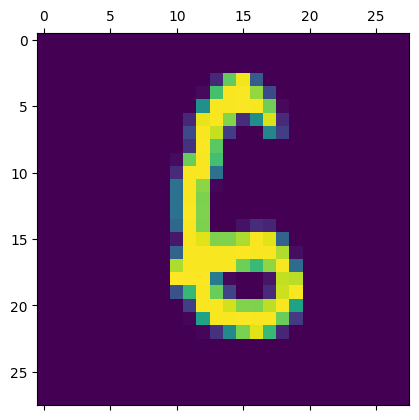

In [76]:
print(f'Prediction done by NN was: {model_prediction} and the hand-written digit at {i} index was: {plt.matshow(x_test[i])}')

In [77]:
y_predicted_labels = [np.argmax(j) for j in y_pred]

In [78]:
Con_Mat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [79]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Actual Value')

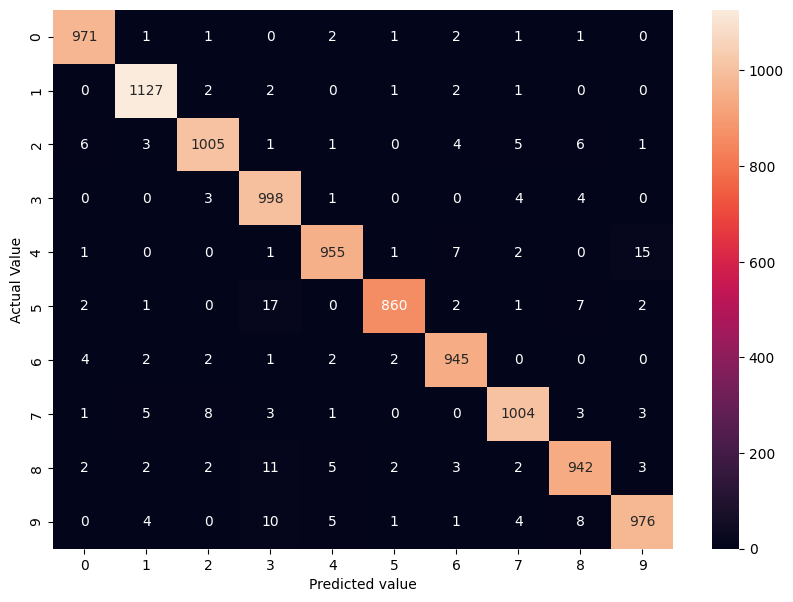

In [80]:
plt.figure(figsize = (10,7))
sns.heatmap(Con_Mat, annot=True, fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')